In [ ]:
from sqlalchemy import create_engine, MetaData
import sqlalchemy
from sqlalchemy.dialects.postgresql import UUID 
from airfare_packages import airfare_classes
from airfare_packages import airfare_visualization
from airfare_packages import airfare_etl
g
engine = create_engine()

In [2]:
with airfare_classes.db_table("airfare_data", engine, MetaData()) as table:
    clean_airfare_data = table.read_table()

In [3]:
clean_airfare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                452088 non-null  object 
 1   date_of_booking   452088 non-null  object 
 2   date_of_journey   452088 non-null  object 
 3   airline           452088 non-null  object 
 4   flight_code       452088 non-null  object 
 5   class             452088 non-null  object 
 6   connections       452088 non-null  int64  
 7   duration_minutes  452088 non-null  int64  
 8   departure_time    452088 non-null  object 
 9   source_city       452088 non-null  object 
 10  arrival_time      452088 non-null  object 
 11  destination_city  452088 non-null  object 
 12  price             452088 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [ ]:
clean_airfare_data.describe().round(2)

,connections,duration_minutes,price
count,452088.00,452088.00,452088.00
mean,0.95,740.95,22840.10
std,0.42,445.89,20307.96
min,0.00,45.00,1307.00
25%,1.00,395.00,8762.75
50%,1.00,680.00,13407.00
75%,1.00,990.00,35587.00
max,2.00,2615.00,143019.00


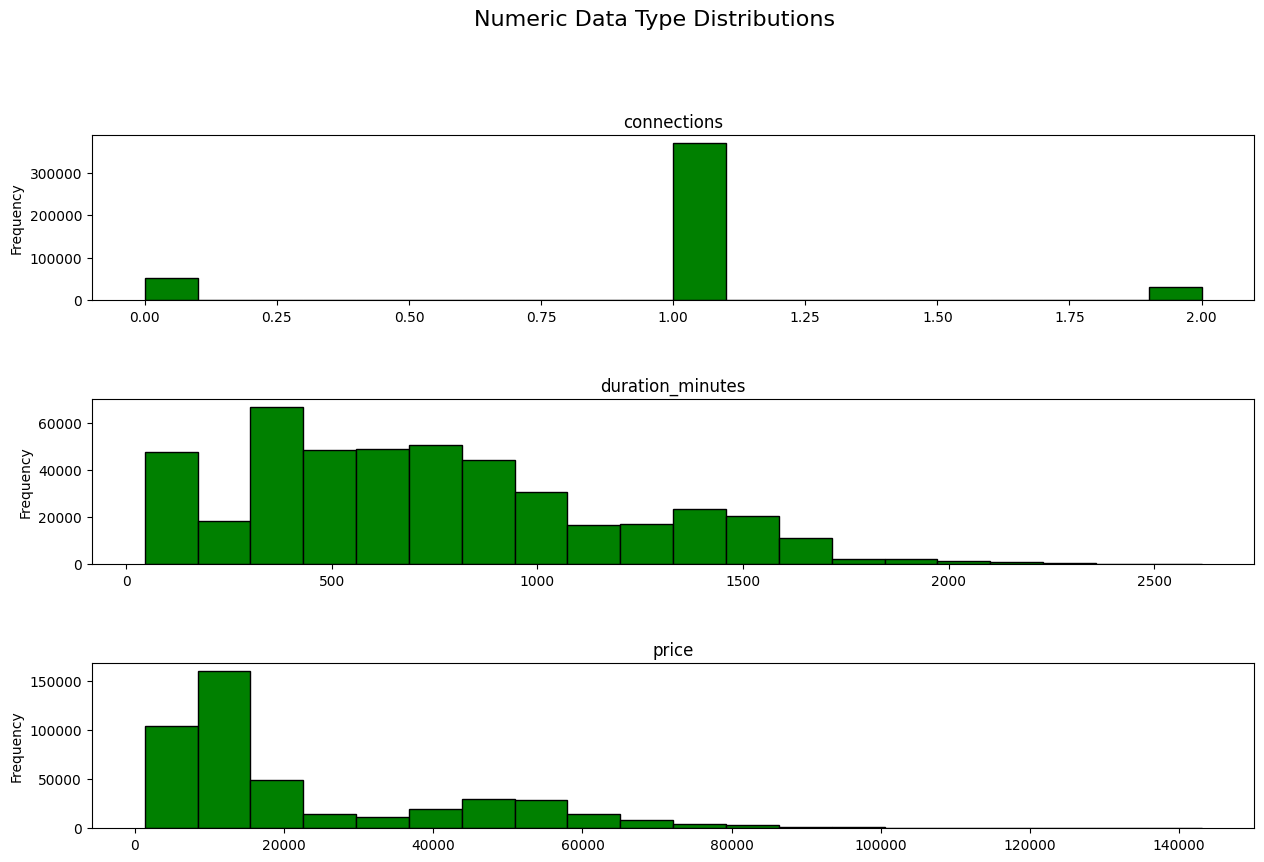

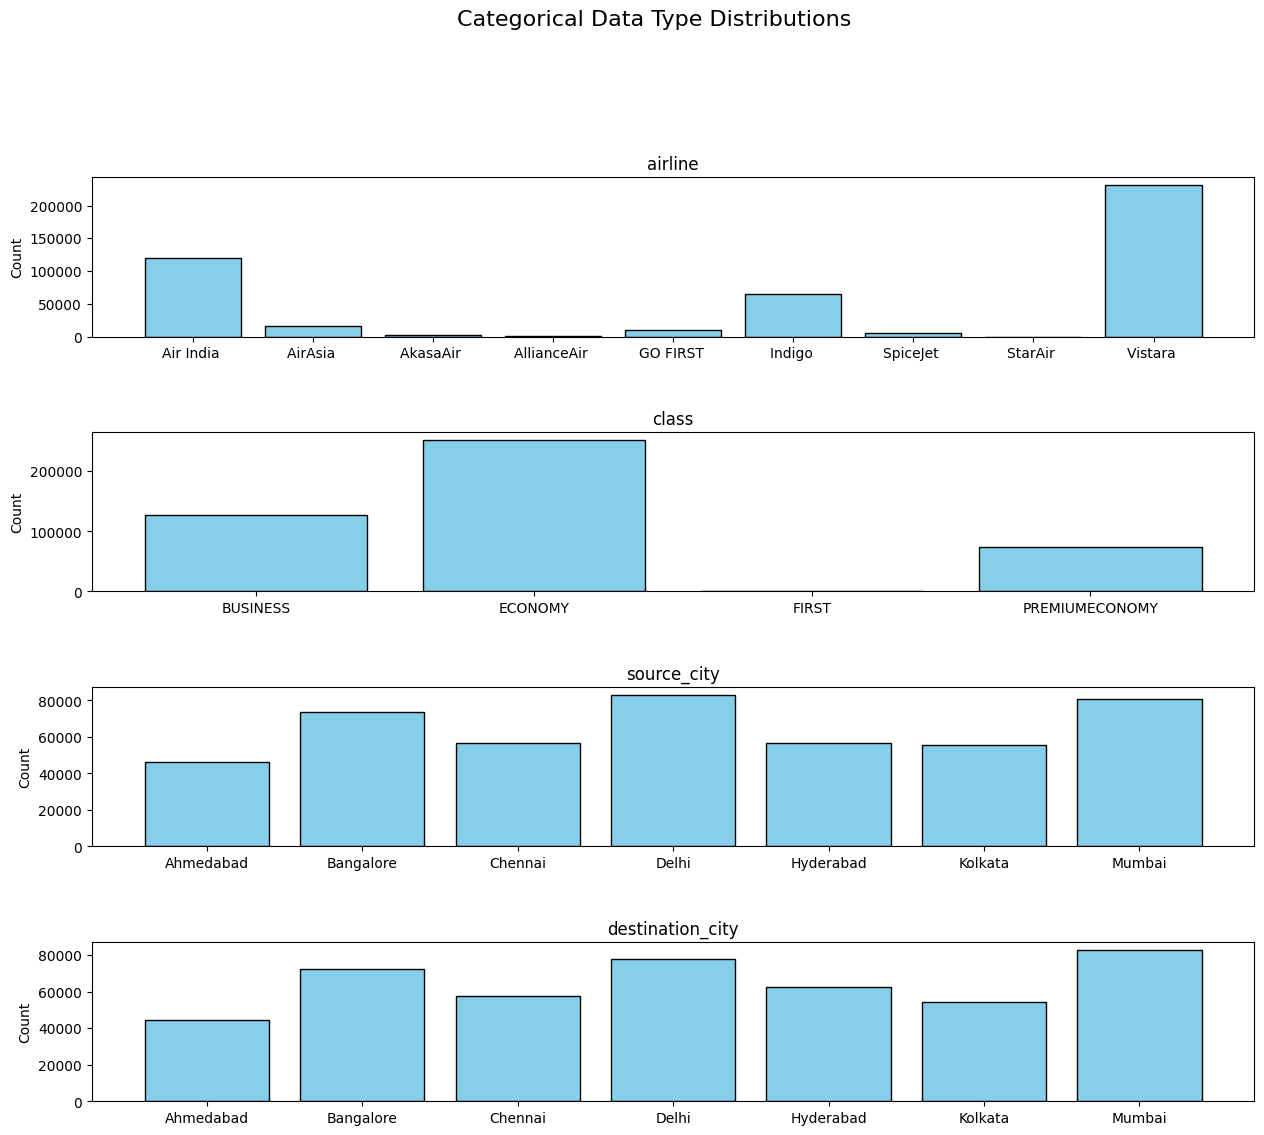

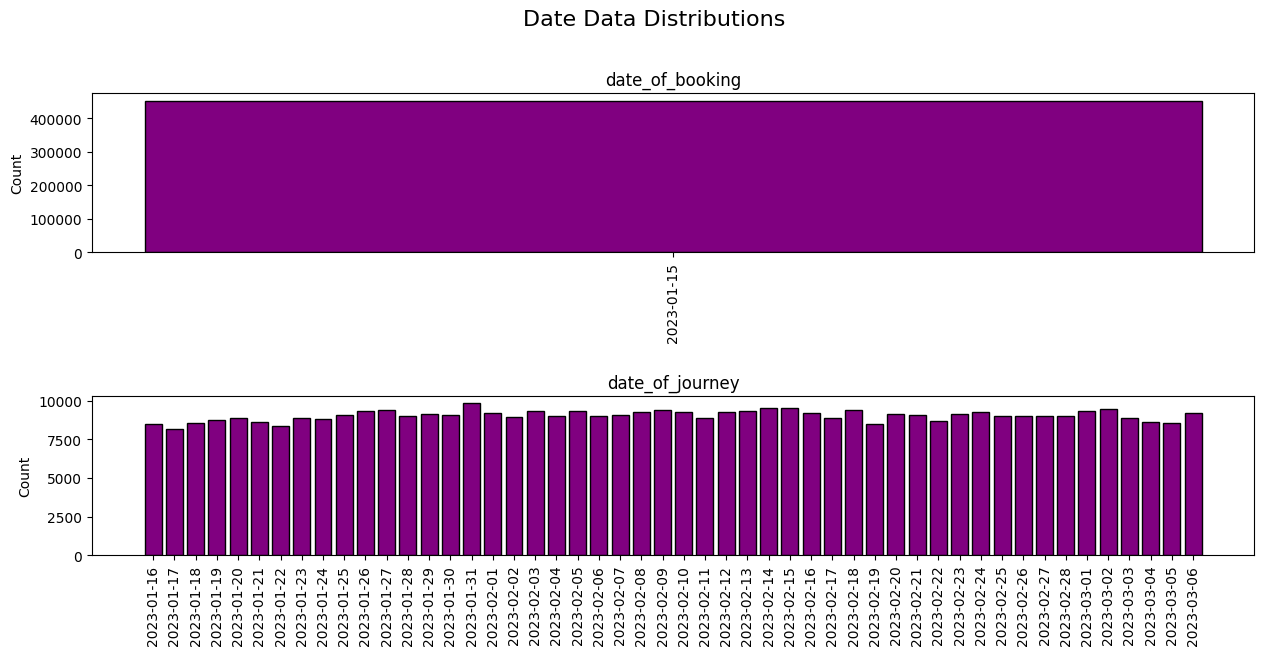

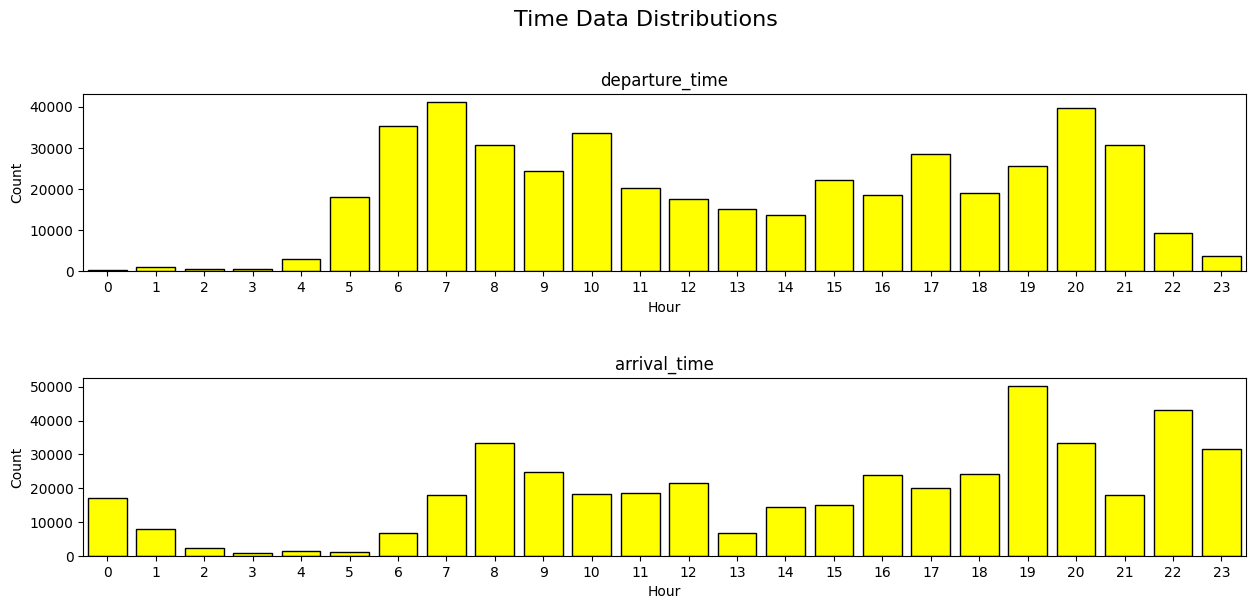

In [5]:
airfare_visualization.visualize_data_distribution(clean_airfare_data)

,connections,duration_minutes,price
connections,1.000000,0.496742,0.126020
duration_minutes,0.496742,1.000000,0.179909
price,0.126020,0.179909,1.000000


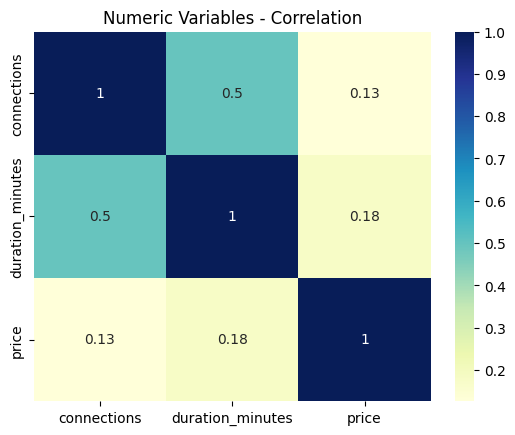

In [6]:
airfare_visualization.visualize_numeric_vars_correlation(clean_airfare_data)

,airline,class,source_city,destination_city
airline,1.000000,0.344866,0.070155,0.065425
class,0.344866,1.000000,0.039128,0.036321
source_city,0.070155,0.039128,1.000000,0.180155
destination_city,0.065425,0.036321,0.180155,1.000000


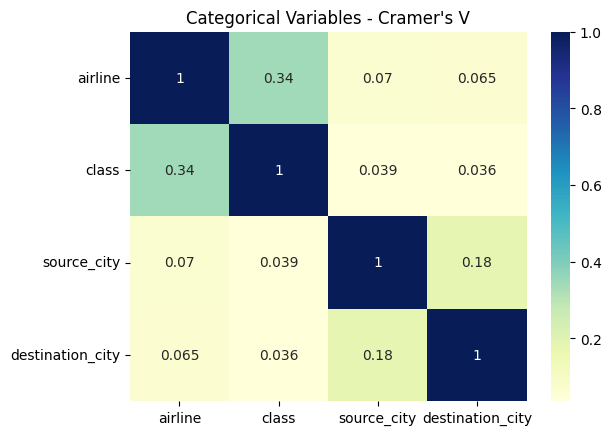

In [7]:
airfare_visualization.visualize_cramers_v(clean_airfare_data)

,airline,class,source_city,destination_city
connections,0.081684,0.013946,0.005232,0.014982
duration_minutes,0.198341,0.046236,0.010146,0.015572
price,0.155953,0.799018,0.005431,0.004655


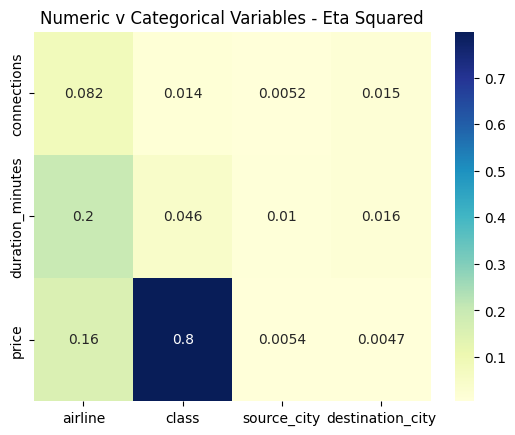

In [8]:
airfare_visualization.visualize_numeric_categorical_relationship(clean_airfare_data)

In [ ]:
airfare_data_ml = airfare_etl.convert_data_to_ml_format(clean_airfare_data)

In [10]:
airfare_data_ml.dtypes

id                                                    object
connections                                            int64
duration_minutes                                       int64
price                                                float64
airline_AirAsia                                        int64
airline_AkasaAir                                       int64
airline_AllianceAir                                    int64
airline_GO_FIRST                                       int64
airline_Indigo                                         int64
airline_SpiceJet                                       int64
airline_StarAir                                        int64
airline_Vistara                                        int64
class_ECONOMY                                          int64
class_FIRST                                            int64
class_PREMIUMECONOMY                                   int64
source_city_Bangalore                                  int64
source_city_Chennai     

/Users/willbrennan/Desktop/Coding/personal_repo/flight_fare_project/airfare_venv/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/willbrennan/Desktop/Coding/personal_repo/flight_fare_project/airfare_venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


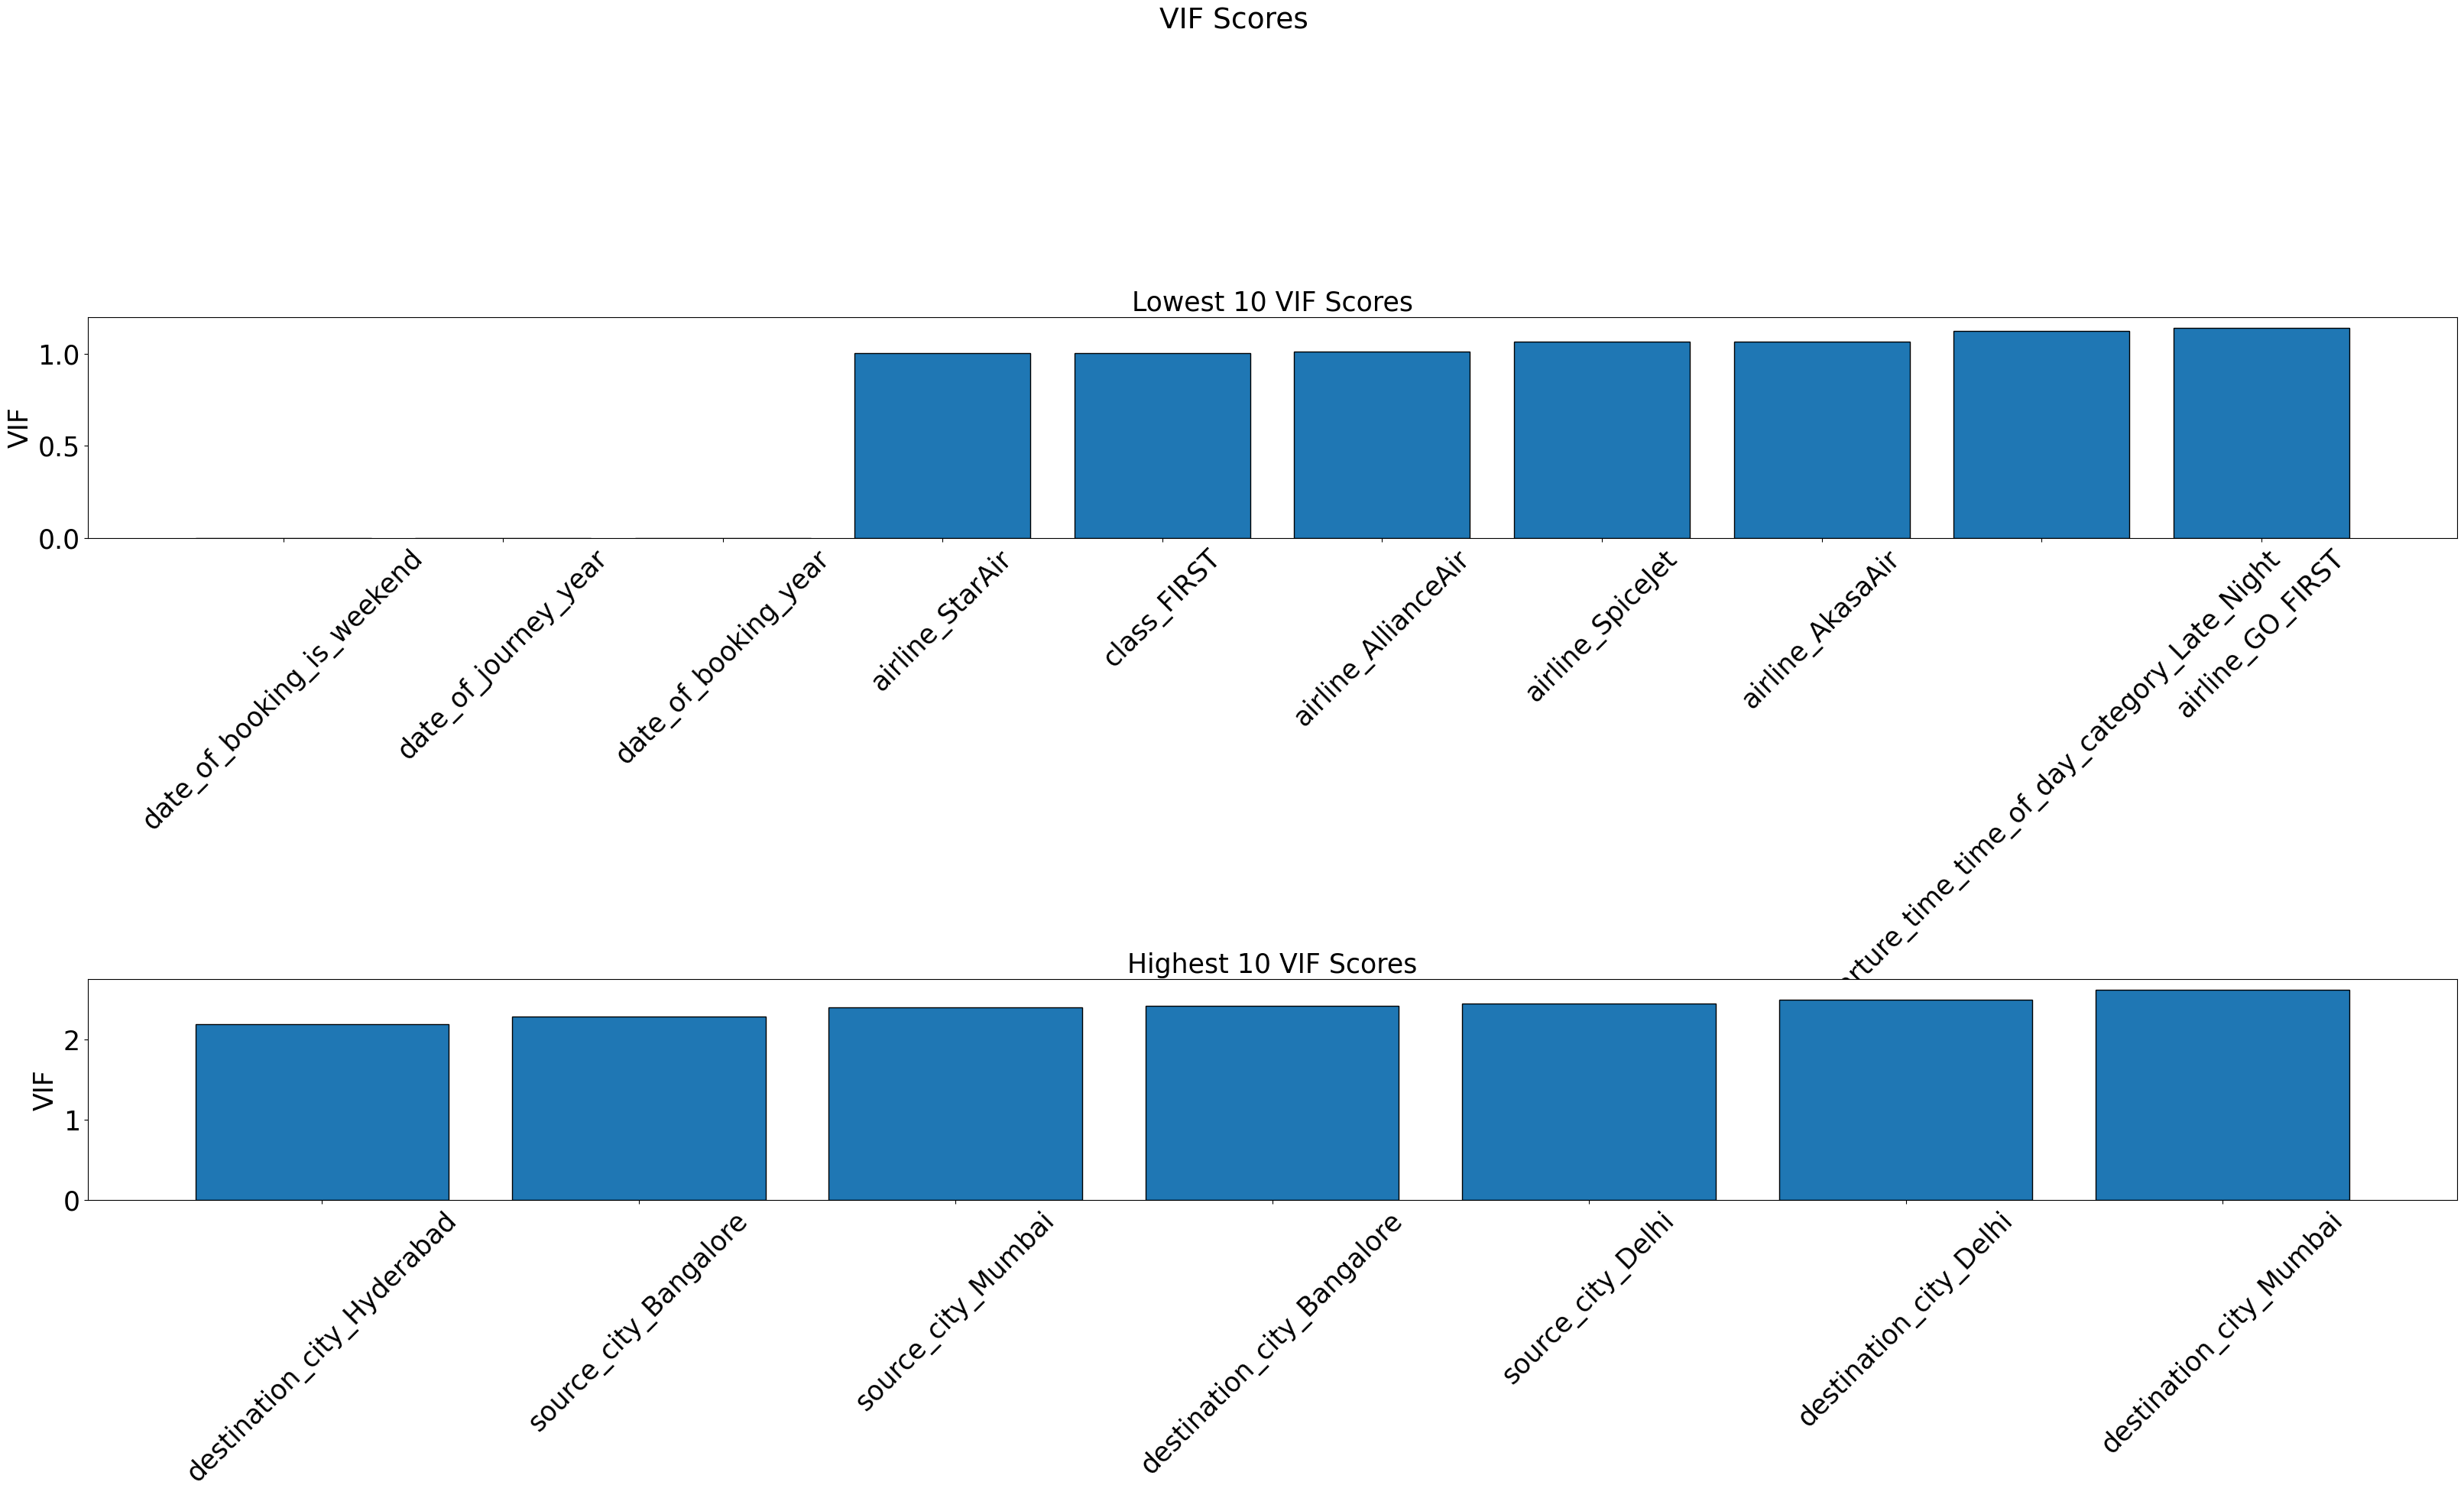

In [11]:
initial_vif = airfare_visualization.visualization_predictor_vif(airfare_data_ml)

In [12]:
initial_vif

,feature,VIF
26,date_of_booking_is_weekend,0.000000
27,date_of_journey_year,0.000000
25,date_of_booking_year,0.000000
8,airline_StarAir,1.002256
11,class_FIRST,1.006101
4,airline_AllianceAir,1.011055
7,airline_SpiceJet,1.066376
3,airline_AkasaAir,1.067111
39,departure_time_time_of_day_category_Late_Night,1.123528
5,airline_GO_FIRST,1.142283


In [13]:
indicators_to_remove = [e for e in airfare_data_ml.columns if "date_of_booking" in e]
indicators_to_remove.extend(["date_of_journey_is_weekend",'date_of_journey_year'])
final_airfare_ml_data= airfare_data_ml.drop(indicators_to_remove,axis=1)

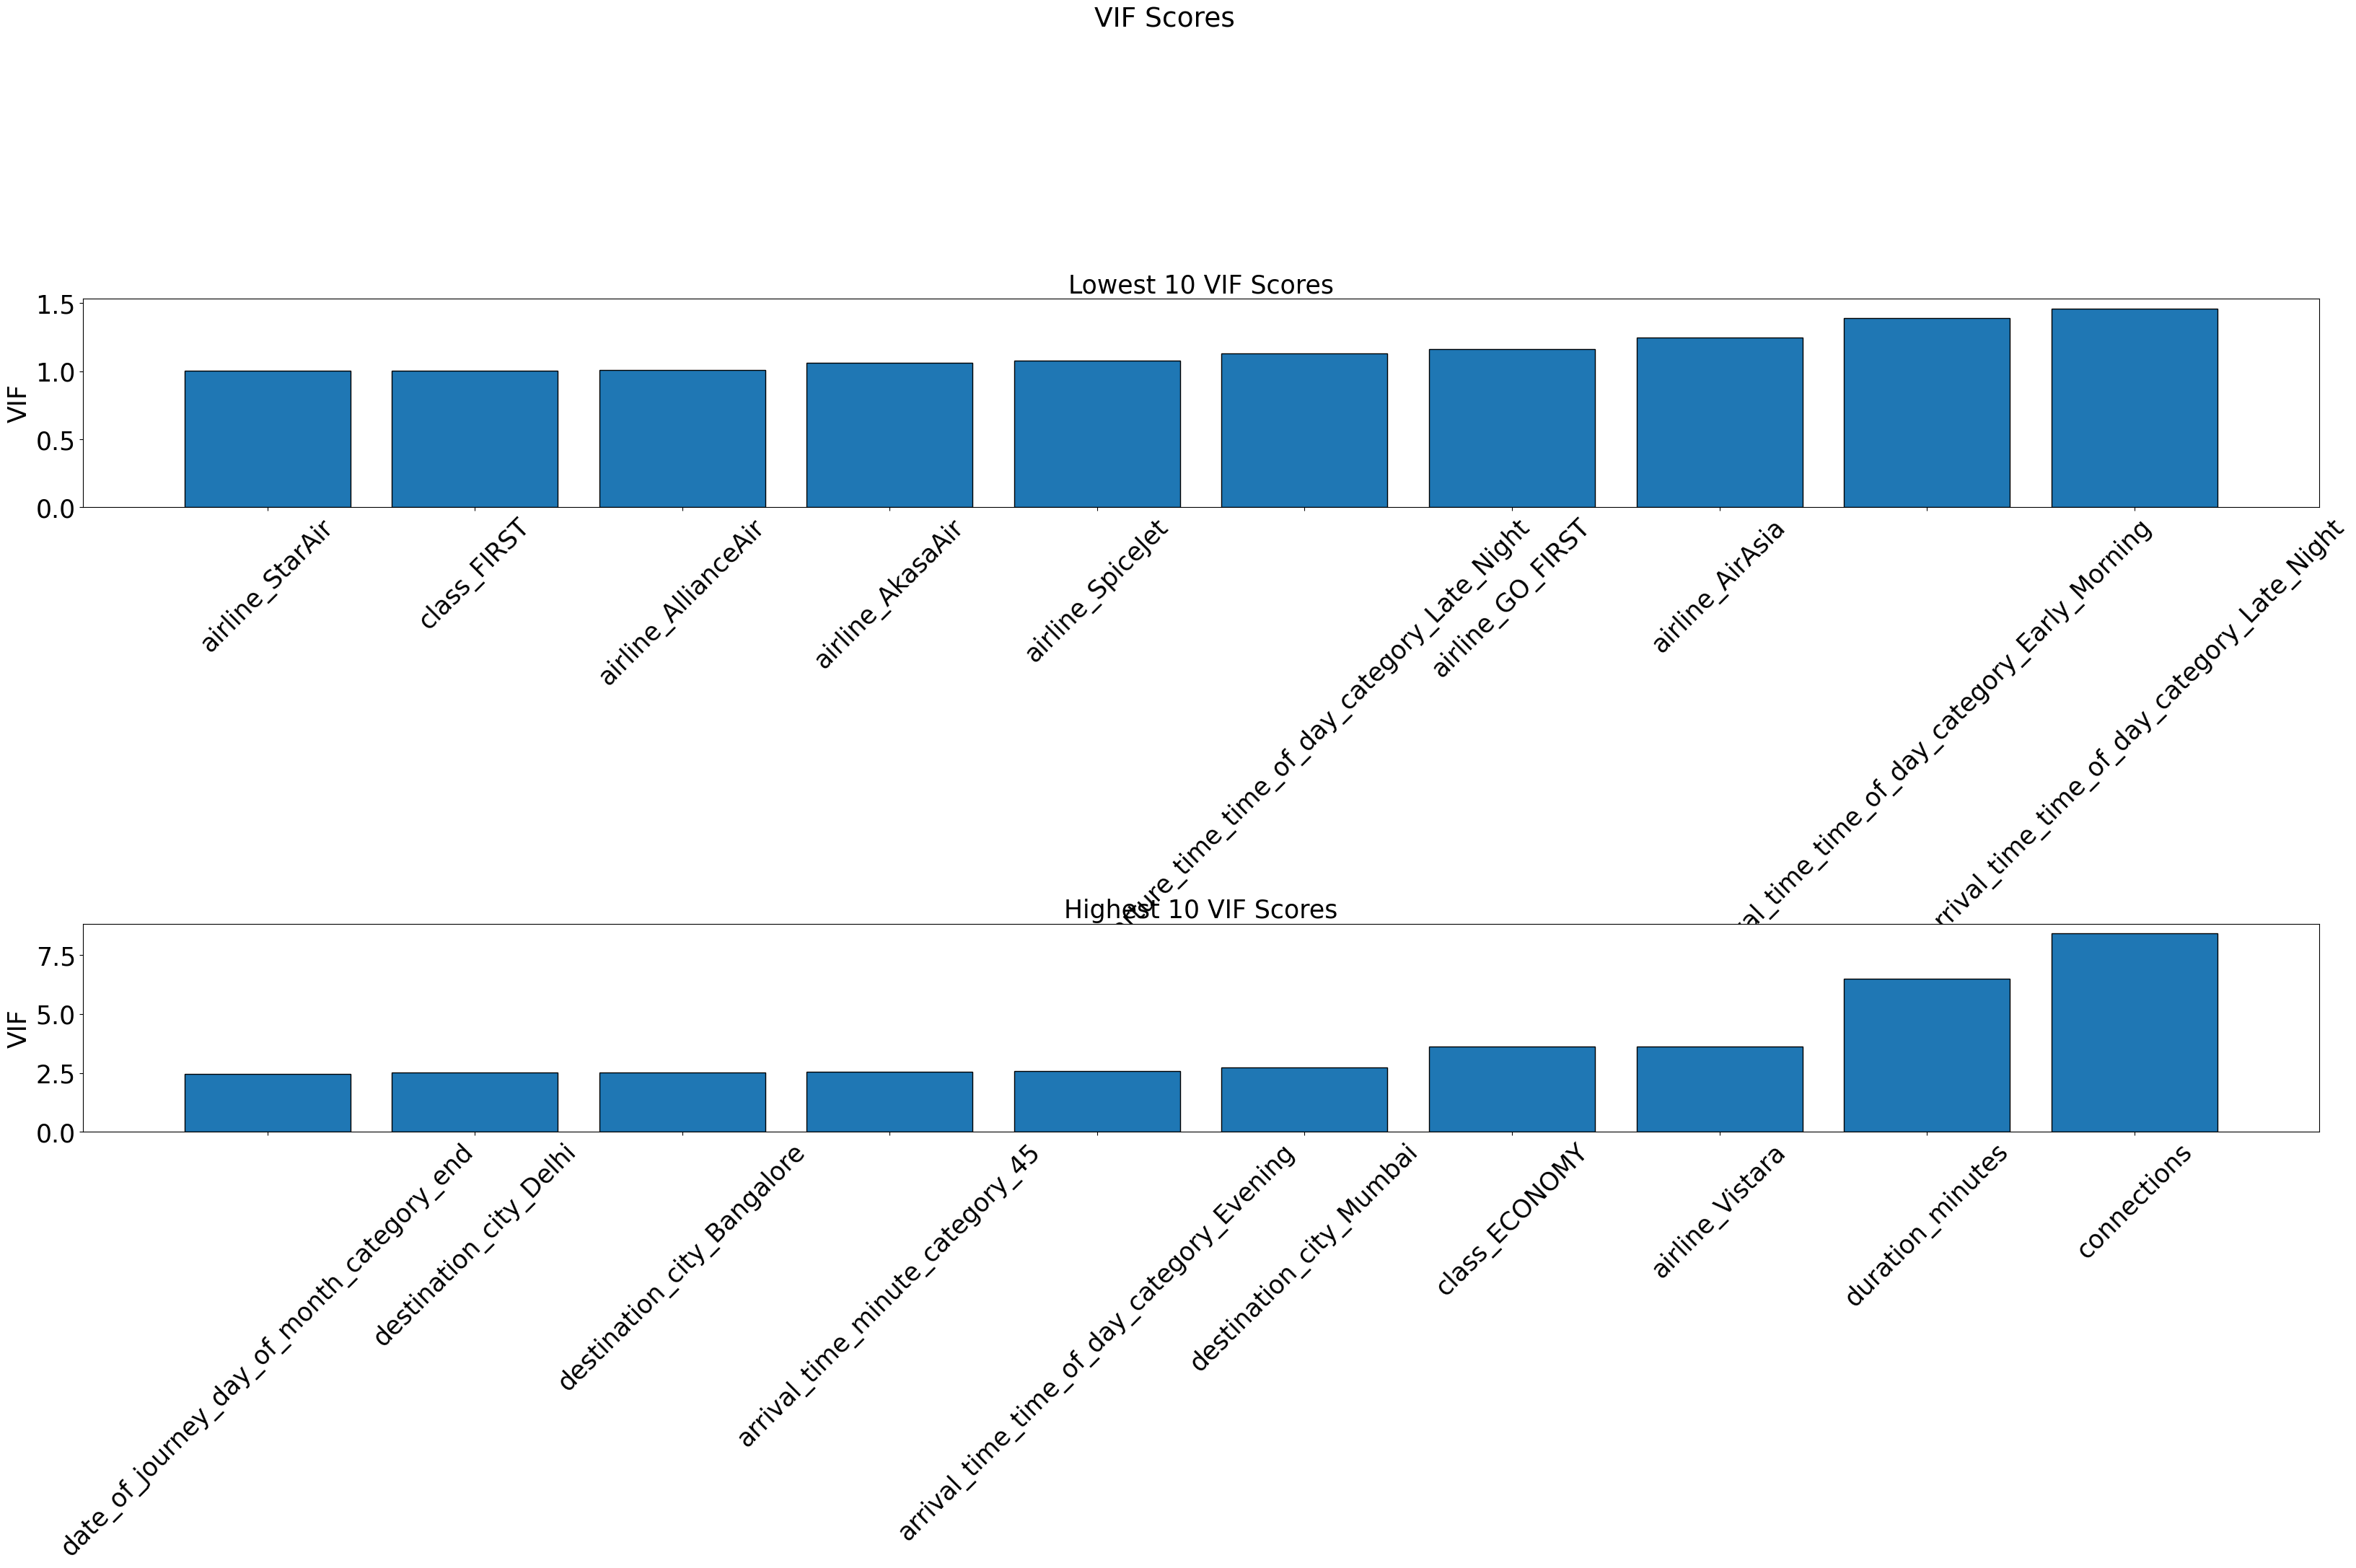

In [14]:
final_vif = airfare_visualization.visualization_predictor_vif(final_airfare_ml_data)

In [15]:
final_vif

,feature,VIF
8,airline_StarAir,1.002255
11,class_FIRST,1.005754
4,airline_AllianceAir,1.010686
3,airline_AkasaAir,1.060535
7,airline_SpiceJet,1.077567
35,departure_time_time_of_day_category_Late_Night,1.131538
5,airline_GO_FIRST,1.162576
2,airline_AirAsia,1.248162
41,arrival_time_time_of_day_category_Early_Morning,1.393081
43,arrival_time_time_of_day_category_Late_Night,1.459071


In [16]:
db_col_definitions = [ 
    sqlalchemy.Column("id", UUID(as_uuid=True), primary_key=True),
    sqlalchemy.Column('price', sqlalchemy.Float),  
    sqlalchemy.Column('duration_minutes', sqlalchemy.Float),
    sqlalchemy.Column('connections', sqlalchemy.Integer),
    sqlalchemy.Column('airline_AirAsia', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_AkasaAir', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_AllianceAir', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_GO_FIRST', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_Indigo', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_SpiceJet', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_StarAir', sqlalchemy.Boolean),
    sqlalchemy.Column('airline_Vistara', sqlalchemy.Boolean),
    sqlalchemy.Column('class_ECONOMY', sqlalchemy.Boolean),
    sqlalchemy.Column('class_FIRST', sqlalchemy.Boolean),
    sqlalchemy.Column('class_PREMIUMECONOMY', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Bangalore', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Chennai', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Delhi', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Hyderabad', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Kolkata', sqlalchemy.Boolean),
    sqlalchemy.Column('source_city_Mumbai', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Bangalore', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Chennai', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Delhi', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Hyderabad', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Kolkata', sqlalchemy.Boolean),
    sqlalchemy.Column('destination_city_Mumbai', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_month_category_end', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_month_category_middle', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Monday', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Saturday', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Sunday', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Thursday', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Tuesday', sqlalchemy.Boolean),
    sqlalchemy.Column('date_of_journey_day_of_week_cat_Wednesday', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_time_of_day_category_Early_Morning', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_time_of_day_category_Evening', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_time_of_day_category_Late_Night', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_time_of_day_category_Morning', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_time_of_day_category_Night', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_minute_category_15', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_minute_category_30', sqlalchemy.Boolean),
    sqlalchemy.Column('departure_time_minute_category_45', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_time_of_day_category_Early_Morning', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_time_of_day_category_Evening', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_time_of_day_category_Late_Night', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_time_of_day_category_Morning', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_time_of_day_category_Night', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_minute_category_15', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_minute_category_30', sqlalchemy.Boolean),
    sqlalchemy.Column('arrival_time_minute_category_45', sqlalchemy.Boolean),
    ]

In [17]:
with airfare_classes.db_table("airfare_data_ml",engine,MetaData()) as table:
    table.create_table(db_col_definitions)
    table.initial_data_upload(final_airfare_ml_data)